<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch10_Reinforced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium

In [ ]:
import numpy as np
import random

In [ ]:
import gymnasium as gym

In [ ]:
from tqdm import trange
import matplotlib.pyplot as plt

Specify the Environment \\
S - Start \\
F - Frozen \\
H - Hole in the Ice \\
G - Goal \\

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="ansi")
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_states, n_actions = env.observation_space.n, env.action_space.n
print('{} states'.format(n_states))
print('{} actions'.format(n_actions))

16 states
4 actions


## View Setup

In [ ]:
max_iteration = 10
env.reset()

for i in range(max_iteration):
    random_action = env.action_space.sample()
    new_state, reward, terminate, info, extra_value = env.step(random_action)
    print(env.render())

  (Up)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG



## Brute Force

In [ ]:
n_episodes = 100
reward_array = np.zeros(n_episodes)

In [ ]:
t = trange(n_episodes)

for i in t:
    env.reset()
    done = False

    while not done:
        random_action = env.action_space.sample()
        new_state, reward, done, info, extra_value = env.step(random_action)

        if done:
            #print(env.render())
            #if new_state == 15:
            #    print("We reached our Goal 🏆")
            #else:
            #    print("We fell into a hole ☠️")

            #print("Number of steps", step)
            t.set_description('Episode {} Reward {}'.format(i + 1, reward))
            t.refresh()
            reward_array[i] = reward
            break
env.close()

Episode 100 Reward 0.0: 100%|██████████| 100/100 [00:00<00:00, 174.60it/s]


Reward

In [ ]:
avg_reward = round(np.mean(reward_array), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 0.0


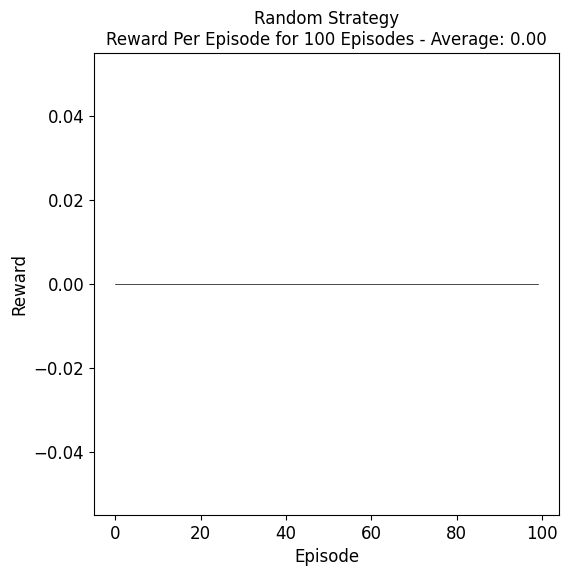

In [ ]:
plt.subplots(figsize = (6, 6), dpi=100)
plt.plot(reward_array, color='black', linewidth=0.5)
plt.ylabel('Reward', fontsize=12)
plt.xlabel('Episode', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Random Strategy\nReward Per Episode for {} Episodes - Average: {:.2f}'.format(n_episodes, avg_reward),
          fontsize=12)
plt.show()

## Q-Learning

In [ ]:
qtable = np.zeros((n_states, n_actions))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hyperparameters

In [ ]:
n_episodes = 20000           # Number of episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.005            # Exponential decay rate for exploration prob

Q-Learning

In [ ]:
rewards = []
t = trange(n_episodes)

for i in t:
    env.reset()
    s = 0
    a = np.argmax(qtable[s,:])
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        random_int = random.uniform(0,1) #generate a random number
        if random_int > epsilon:
            a = np.argmax(qtable[s, :])
        else:
            a = env.action_space.sample()

        new_state, reward, done, info, extra_value = env.step(a)

        # Update Q
        qtable[s,a] =  qtable[s,a] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[s,a])

        total_rewards += reward # Add to rewards

        s = new_state # Update state

        if done == True:
            print(env.render())
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")

            print("Number of steps", step)
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
    rewards.append(total_rewards)


print ("Score over time: " +  str(sum(rewards)/n_episodes))
print(qtable)

  0%|          | 40/20000 [00:00<00:53, 373.79it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down

  1%|          | 119/20000 [00:00<00:51, 385.79it/s]

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell in

  1%|          | 199/20000 [00:00<00:53, 370.60it/s]

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFF

  1%|▏         | 297/20000 [00:00<00:48, 407.31it/s]


We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

  2%|▏         | 393/20000 [00:00<00:47, 413.99it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41

  2%|▏         | 474/20000 [00:01<00:52, 374.70it/s]

Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hol

  3%|▎         | 512/20000 [00:01<01:00, 320.64it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of 

  3%|▎         | 576/20000 [00:01<01:17, 250.32it/s]

 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10

  3%|▎         | 639/20000 [00:01<01:10, 272.71it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right

  4%|▎         | 703/20000 [00:02<01:06, 289.42it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17

  4%|▎         | 733/20000 [00:02<01:09, 278.35it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG


  4%|▍         | 789/20000 [00:02<01:28, 218.16it/s]


We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We

  4%|▍         | 841/20000 [00:02<01:21, 235.39it/s]

We fell into a hole ☠️
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

W

  4%|▍         | 895/20000 [00:03<01:21, 235.76it/s]


We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

  5%|▍         | 948/20000 [00:03<01:18, 243.12it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (D

  5%|▍         | 999/20000 [00:03<01:17, 246.54it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 95
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2

  5%|▌         | 1053/20000 [00:03<01:15, 252.44it/s]


We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We 

  6%|▌         | 1104/20000 [00:03<01:20, 233.39it/s]


Number of steps 32
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of 

  6%|▌         | 1158/20000 [00:04<01:17, 243.77it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (

  6%|▌         | 1212/20000 [00:04<01:15, 247.51it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37


  6%|▋         | 1268/20000 [00:04<01:11, 261.02it/s]

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

  7%|▋         | 1329/20000 [00:04<01:08, 272.26it/s]

18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of s

  7%|▋         | 1383/20000 [00:04<01:19, 234.68it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (

  7%|▋         | 1431/20000 [00:05<01:19, 234.98it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (

  7%|▋         | 1479/20000 [00:05<01:20, 229.38it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
F

  8%|▊         | 1530/20000 [00:05<01:19, 232.82it/s]


We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 75
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG


  8%|▊         | 1578/20000 [00:05<01:20, 228.61it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 73
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 84
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of st

  8%|▊         | 1624/20000 [00:06<01:22, 222.35it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

  8%|▊         | 1676/20000 [00:06<01:17, 237.77it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
 

  9%|▊         | 1732/20000 [00:06<01:12, 250.53it/s]

Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole 

  9%|▉         | 1783/20000 [00:06<01:16, 238.74it/s]


Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️

  9%|▉         | 1838/20000 [00:06<01:10, 256.43it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1

  9%|▉         | 1893/20000 [00:07<01:09, 259.85it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18


 10%|▉         | 1947/20000 [00:07<01:10, 255.24it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 10%|█         | 2001/20000 [00:07<01:11, 251.08it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 10%|█         | 2054/20000 [00:07<01:11, 249.89it/s]


We fell into a hole ☠️
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG



 11%|█         | 2105/20000 [00:07<01:12, 247.35it/s]

12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 88
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37

 11%|█         | 2159/20000 [00:08<01:09, 256.35it/s]


Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
N

 11%|█         | 2213/20000 [00:08<01:08, 258.74it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 85
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
 

 11%|█▏        | 2264/20000 [00:08<01:13, 241.06it/s]


Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Num

 12%|█▏        | 2321/20000 [00:08<01:08, 258.78it/s]


  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 84
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 12%|█▏        | 2379/20000 [00:08<01:04, 274.17it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 78
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  

 12%|█▏        | 2451/20000 [00:09<01:00, 287.98it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
 

 13%|█▎        | 2508/20000 [00:09<01:04, 269.54it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  

 13%|█▎        | 2566/20000 [00:09<01:03, 275.78it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 85
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 93
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
F

 13%|█▎        | 2627/20000 [00:09<01:01, 282.96it/s]


We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 83
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 91
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG



 13%|█▎        | 2656/20000 [00:09<01:06, 262.17it/s]


We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

 14%|█▎        | 2716/20000 [00:10<01:02, 274.39it/s]


We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG


 14%|█▍        | 2774/20000 [00:10<01:01, 279.35it/s]


We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We f

 14%|█▍        | 2831/20000 [00:10<01:06, 258.69it/s]


We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFF

 14%|█▍        | 2884/20000 [00:10<01:09, 247.53it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Do

 15%|█▍        | 2938/20000 [00:11<01:06, 256.82it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
 

 15%|█▍        | 2994/20000 [00:11<01:06, 255.69it/s]

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HF

 15%|█▌        | 3045/20000 [00:11<01:09, 245.65it/s]

We fell into a hole ☠️
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We

 15%|█▌        | 3095/20000 [00:11<01:09, 241.58it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
 

 16%|█▌        | 3145/20000 [00:11<01:09, 241.14it/s]


We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 94
  (Down)
SFFF
FHFH
FFFH
HFFG



 16%|█▌        | 3171/20000 [00:12<01:09, 241.50it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 94
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32

 16%|█▌        | 3231/20000 [00:12<01:03, 262.29it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  

 16%|█▋        | 3286/20000 [00:12<01:07, 246.02it/s]


Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 78
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Numb

 17%|█▋        | 3336/20000 [00:12<01:08, 243.41it/s]

 77
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 93
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of step

 17%|█▋        | 3386/20000 [00:12<01:11, 233.34it/s]

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 75
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 83
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We 

 17%|█▋        | 3435/20000 [00:13<01:10, 234.38it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (D

 17%|█▋        | 3485/20000 [00:13<01:09, 238.51it/s]

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 91
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

 18%|█▊        | 3538/20000 [00:13<01:05, 250.91it/s]

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We 

 18%|█▊        | 3588/20000 [00:13<01:10, 232.90it/s]

Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 18%|█▊        | 3641/20000 [00:13<01:13, 222.81it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Up)


 18%|█▊        | 3690/20000 [00:14<01:10, 229.80it/s]

We fell into a hole ☠️
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 88
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG


 19%|█▊        | 3745/20000 [00:14<01:05, 248.51it/s]


We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell

 19%|█▉        | 3798/20000 [00:14<01:06, 244.93it/s]


We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

 19%|█▉        | 3848/20000 [00:14<01:08, 235.08it/s]

38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 

 20%|█▉        | 3903/20000 [00:15<01:03, 251.72it/s]

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH

 20%|█▉        | 3958/20000 [00:15<01:01, 259.72it/s]


We fell into a hole ☠️
Number of steps 42
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We re

 20%|██        | 4013/20000 [00:15<01:02, 253.83it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 95
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  

 20%|██        | 4067/20000 [00:15<01:01, 257.69it/s]


We fell into a hole ☠️
Number of steps 68
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FF

 21%|██        | 4119/20000 [00:15<01:04, 246.26it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of st

 21%|██        | 4174/20000 [00:16<01:01, 256.58it/s]

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 21%|██        | 4226/20000 [00:16<01:03, 248.67it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19

 21%|██▏       | 4280/20000 [00:16<01:02, 251.69it/s]

Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 89
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number o

 22%|██▏       | 4334/20000 [00:16<01:03, 247.21it/s]

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG


 22%|██▏       | 4384/20000 [00:16<01:08, 229.17it/s]


  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 22%|██▏       | 4431/20000 [00:17<01:12, 215.89it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (

 22%|██▏       | 4481/20000 [00:17<01:07, 229.09it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65


 23%|██▎       | 4531/20000 [00:17<01:06, 233.72it/s]


We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG


 23%|██▎       | 4579/20000 [00:17<01:08, 225.54it/s]


Number of steps 65
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goa

 23%|██▎       | 4633/20000 [00:18<01:02, 244.69it/s]

We fell into a hole ☠️
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFF

 23%|██▎       | 4686/20000 [00:18<01:00, 252.80it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (

 24%|██▎       | 4743/20000 [00:18<00:58, 261.59it/s]


Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 24%|██▍       | 4797/20000 [00:18<01:00, 252.72it/s]


We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Right)
SFFF
FHFH
FFF

 24%|██▍       | 4849/20000 [00:18<01:00, 252.21it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
 

 25%|██▍       | 4903/20000 [00:19<01:00, 251.34it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 95
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Do

 25%|██▍       | 4955/20000 [00:19<01:00, 250.69it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 79
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 83
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Up)
SFFF

 25%|██▌       | 5006/20000 [00:19<01:04, 232.41it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 97
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
 

 25%|██▌       | 5055/20000 [00:19<01:03, 234.98it/s]


Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 73
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 75
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a ho

 26%|██▌       | 5107/20000 [00:19<01:01, 241.33it/s]


We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

 26%|██▌       | 5160/20000 [00:20<01:00, 247.06it/s]


We reached our Goal 🏆
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG



 26%|██▌       | 5226/20000 [00:20<00:50, 290.67it/s]


We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 87
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG



 26%|██▋       | 5284/20000 [00:20<00:56, 258.37it/s]

We reached our Goal 🏆
Number of steps 40
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 95
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FF

 27%|██▋       | 5337/20000 [00:20<00:59, 247.11it/s]


We reached our Goal 🏆
Number of steps 84
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH


 27%|██▋       | 5387/20000 [00:21<01:00, 243.37it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 97
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 

 27%|██▋       | 5446/20000 [00:21<00:54, 266.90it/s]

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Up)
SFFF
FHFH
FFFH
HFFG


 28%|██▊       | 5504/20000 [00:21<00:52, 276.44it/s]

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 60
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG


 28%|██▊       | 5560/20000 [00:21<00:54, 265.81it/s]


Number of steps 19
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number

 28%|██▊       | 5614/20000 [00:21<00:56, 253.19it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (

 28%|██▊       | 5666/20000 [00:22<00:58, 245.47it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 90
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Do

 29%|██▊       | 5720/20000 [00:22<00:57, 249.39it/s]

Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️


 29%|██▉       | 5775/20000 [00:22<00:55, 256.43it/s]


We reached our Goal 🏆
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 83
  (Down)
SFFF
FHFH
FFF

 29%|██▉       | 5829/20000 [00:22<00:58, 241.47it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (

 29%|██▉       | 5883/20000 [00:23<00:55, 252.13it/s]

 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  

 30%|██▉       | 5944/20000 [00:23<00:51, 271.53it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55


 30%|███       | 6003/20000 [00:23<00:50, 278.61it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Dow

 30%|███       | 6070/20000 [00:23<00:49, 280.04it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of 

 31%|███       | 6134/20000 [00:23<00:47, 293.48it/s]


  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (

 31%|███       | 6164/20000 [00:23<00:52, 265.77it/s]


We fell into a hole ☠️
Number of steps 50
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG


 31%|███       | 6222/20000 [00:24<00:51, 265.28it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 

 31%|███▏      | 6282/20000 [00:24<00:49, 279.27it/s]


We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

 32%|███▏      | 6344/20000 [00:24<00:47, 286.74it/s]


  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
 

 32%|███▏      | 6401/20000 [00:24<00:50, 268.05it/s]


We fell into a hole ☠️
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

 32%|███▏      | 6455/20000 [00:25<00:55, 244.37it/s]

5
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10


 33%|███▎      | 6514/20000 [00:25<00:50, 267.16it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 33%|███▎      | 6569/20000 [00:25<00:50, 264.21it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 98
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of 

 33%|███▎      | 6627/20000 [00:25<00:51, 261.53it/s]


We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Right)
SFFF
FHFH
FFFH
H

 33%|███▎      | 6654/20000 [00:25<00:53, 250.06it/s]


We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFF

 34%|███▎      | 6705/20000 [00:26<00:53, 247.25it/s]


We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG


 34%|███▍      | 6772/20000 [00:26<00:45, 290.12it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30


 34%|███▍      | 6831/20000 [00:26<00:48, 274.26it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6


 34%|███▍      | 6886/20000 [00:26<00:52, 251.13it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 91
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 90
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  

 35%|███▍      | 6945/20000 [00:26<00:49, 266.37it/s]


We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFF

 35%|███▌      | 7000/20000 [00:27<00:49, 264.92it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down

 35%|███▌      | 7053/20000 [00:27<00:51, 251.71it/s]


Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 36%|███▌      | 7104/20000 [00:27<00:55, 231.51it/s]


We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We r

 36%|███▌      | 7156/20000 [00:27<00:55, 232.82it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 78
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2

 36%|███▌      | 7214/20000 [00:28<00:51, 246.37it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  

 36%|███▋      | 7270/20000 [00:28<00:48, 260.46it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 72
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 78
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps

 37%|███▋      | 7326/20000 [00:28<00:50, 252.89it/s]


We fell into a hole ☠️
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH

 37%|███▋      | 7378/20000 [00:28<00:50, 248.31it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 98
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFF

 37%|███▋      | 7429/20000 [00:28<00:50, 247.35it/s]


We reached our Goal 🏆
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 90
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG



 37%|███▋      | 7483/20000 [00:29<00:49, 254.61it/s]


We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Up)
SFFF
FHFH
FFFH
HFFG

We

 38%|███▊      | 7535/20000 [00:29<00:49, 252.80it/s]


We reached our Goal 🏆
Number of steps 83
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HF

 38%|███▊      | 7588/20000 [00:29<00:48, 254.49it/s]


Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 85
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️

 38%|███▊      | 7647/20000 [00:29<00:45, 271.18it/s]


Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 75
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Nu

 39%|███▊      | 7702/20000 [00:29<00:47, 257.43it/s]

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 94
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We re

 39%|███▉      | 7755/20000 [00:30<00:47, 256.87it/s]


  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
 

 39%|███▉      | 7813/20000 [00:30<00:47, 254.74it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21


 39%|███▉      | 7873/20000 [00:30<00:44, 272.31it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
 

 40%|███▉      | 7928/20000 [00:30<00:46, 258.02it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (

 40%|███▉      | 7980/20000 [00:31<00:48, 247.60it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down

 40%|████      | 8035/20000 [00:31<00:47, 252.56it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35

 40%|████      | 8090/20000 [00:31<00:46, 256.05it/s]


We fell into a hole ☠️
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 94
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We

 41%|████      | 8146/20000 [00:31<00:44, 266.62it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 96
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20

 41%|████      | 8200/20000 [00:31<00:46, 251.25it/s]

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Left)
SFFF
FHFH
FFFH
HFFG



 41%|████▏     | 8255/20000 [00:32<00:45, 260.66it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (

 42%|████▏     | 8311/20000 [00:32<00:44, 263.24it/s]


Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number

 42%|████▏     | 8368/20000 [00:32<00:43, 266.92it/s]


Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 72
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆

 42%|████▏     | 8429/20000 [00:32<00:42, 271.32it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps

 42%|████▏     | 8485/20000 [00:32<00:43, 264.63it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (U

 43%|████▎     | 8544/20000 [00:33<00:43, 261.14it/s]


We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We r

 43%|████▎     | 8602/20000 [00:33<00:43, 265.03it/s]


We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 90
  (Down)
SFFF
FHFH
FFFH
HFFG



 43%|████▎     | 8662/20000 [00:33<00:42, 265.08it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of s

 44%|████▎     | 8719/20000 [00:33<00:43, 259.75it/s]

 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 80
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
 

 44%|████▍     | 8774/20000 [00:34<00:43, 258.60it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (D

 44%|████▍     | 8801/20000 [00:34<00:46, 242.28it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Do

 44%|████▍     | 8857/20000 [00:34<00:43, 253.91it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (

 45%|████▍     | 8916/20000 [00:34<00:41, 267.84it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Ri

 45%|████▍     | 8977/20000 [00:34<00:39, 281.93it/s]


  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 45%|████▌     | 9034/20000 [00:35<00:41, 261.65it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 86
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33


 45%|████▌     | 9090/20000 [00:35<00:41, 261.90it/s]


Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number 

 46%|████▌     | 9149/20000 [00:35<00:39, 273.18it/s]


Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Num

 46%|████▌     | 9207/20000 [00:35<00:41, 262.30it/s]

Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Nu

 46%|████▋     | 9269/20000 [00:35<00:38, 281.49it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (D

 47%|████▋     | 9326/20000 [00:36<00:39, 272.18it/s]

We fell into a hole ☠️
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 96
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HF

 47%|████▋     | 9383/20000 [00:36<00:38, 272.87it/s]


Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Numb

 47%|████▋     | 9444/20000 [00:36<00:37, 278.14it/s]

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

 48%|████▊     | 9500/20000 [00:36<00:38, 271.44it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
 

 48%|████▊     | 9557/20000 [00:36<00:39, 266.94it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (

 48%|████▊     | 9611/20000 [00:37<00:40, 259.47it/s]


Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️

 48%|████▊     | 9666/20000 [00:37<00:39, 264.04it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 49%|████▊     | 9723/20000 [00:37<00:38, 264.65it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Do

 49%|████▉     | 9785/20000 [00:37<00:35, 284.13it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (D

 49%|████▉     | 9843/20000 [00:38<00:37, 270.47it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 87
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8

 49%|████▉     | 9871/20000 [00:38<00:38, 262.49it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 95
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29

 50%|████▉     | 9924/20000 [00:38<00:40, 246.73it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 83
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of step

 50%|████▉     | 9983/20000 [00:38<00:37, 265.76it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  

 50%|█████     | 10035/20000 [00:38<00:40, 243.64it/s]


We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fe

 50%|█████     | 10087/20000 [00:39<00:41, 237.96it/s]


Number of steps 90
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Num

 51%|█████     | 10141/20000 [00:39<00:38, 252.93it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12

 51%|█████     | 10193/20000 [00:39<00:40, 245.01it/s]


  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (

 51%|█████     | 10248/20000 [00:39<00:37, 258.27it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (

 51%|█████▏    | 10274/20000 [00:39<00:38, 249.69it/s]


We fell into a hole ☠️
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 93
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 75
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

 52%|█████▏    | 10325/20000 [00:40<00:40, 236.41it/s]


We reached our Goal 🏆
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 52%|█████▏    | 10376/20000 [00:40<00:39, 244.49it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45


 52%|█████▏    | 10427/20000 [00:40<00:40, 233.81it/s]

 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 83
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 1

 52%|█████▏    | 10474/20000 [00:40<00:43, 217.16it/s]


We reached our Goal 🏆
Number of steps 32
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reach

 53%|█████▎    | 10517/20000 [00:40<00:47, 200.80it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (

 53%|█████▎    | 10560/20000 [00:41<00:46, 202.92it/s]


We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 95
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Up)
SFFF
FHFH
FFFH
HFF

 53%|█████▎    | 10609/20000 [00:41<00:42, 221.89it/s]


We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

W

 53%|█████▎    | 10659/20000 [00:41<00:40, 233.52it/s]


We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFF

 53%|█████▎    | 10683/20000 [00:41<00:42, 217.81it/s]

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG



 54%|█████▎    | 10735/20000 [00:41<00:40, 230.14it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39


 54%|█████▍    | 10809/20000 [00:42<00:38, 237.67it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (U

 54%|█████▍    | 10860/20000 [00:42<00:37, 245.71it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 95
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  

 55%|█████▍    | 10914/20000 [00:42<00:35, 256.84it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (D

 55%|█████▍    | 10966/20000 [00:42<00:36, 250.50it/s]


We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

 55%|█████▌    | 11021/20000 [00:43<00:36, 248.41it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Do

 55%|█████▌    | 11076/20000 [00:43<00:35, 254.09it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2

 56%|█████▌    | 11131/20000 [00:43<00:34, 256.60it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 91
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 56%|█████▌    | 11187/20000 [00:43<00:33, 266.13it/s]


We fell into a hole ☠️
Number of steps 44
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our G

 56%|█████▌    | 11242/20000 [00:43<00:32, 265.77it/s]


We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG


 56%|█████▋    | 11295/20000 [00:44<00:35, 246.39it/s]


We fell into a hole ☠️
Number of steps 33
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 57%|█████▋    | 11344/20000 [00:44<00:37, 233.38it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 82
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 57%|█████▋    | 11395/20000 [00:44<00:35, 241.38it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 75
  (D

 57%|█████▋    | 11449/20000 [00:44<00:33, 254.75it/s]


We fell into a hole ☠️
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 96
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 58%|█████▊    | 11505/20000 [00:44<00:32, 264.82it/s]


We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 98
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Left)
SFFF
FHFH
FFFH
HFFG


 58%|█████▊    | 11564/20000 [00:45<00:30, 279.40it/s]


We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Left)
SFFF
FHFH
FFFH
HFF

 58%|█████▊    | 11624/20000 [00:45<00:32, 258.38it/s]


Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 93
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
N

 58%|█████▊    | 11678/20000 [00:45<00:31, 262.11it/s]


We fell into a hole ☠️
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 95
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 59%|█████▊    | 11736/20000 [00:45<00:30, 272.07it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Dow

 59%|█████▉    | 11797/20000 [00:45<00:29, 278.57it/s]

We reached our Goal 🏆
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fel

 59%|█████▉    | 11855/20000 [00:46<00:29, 273.18it/s]

Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Numb

 60%|█████▉    | 11916/20000 [00:46<00:28, 282.25it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
 

 60%|█████▉    | 11977/20000 [00:46<00:28, 281.70it/s]

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

W

 60%|██████    | 12034/20000 [00:46<00:30, 264.93it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  

 60%|██████    | 12090/20000 [00:47<00:30, 258.60it/s]


We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We f

 61%|██████    | 12145/20000 [00:47<00:31, 249.77it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37


 61%|██████    | 12202/20000 [00:47<00:30, 259.65it/s]

We reached our Goal 🏆
Number of steps 96
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH


 61%|██████▏   | 12256/20000 [00:47<00:29, 263.97it/s]

We fell into a hole ☠️
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

 62%|██████▏   | 12322/20000 [00:47<00:28, 271.48it/s]


Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 62%|██████▏   | 12379/20000 [00:48<00:27, 273.39it/s]


Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
N

 62%|██████▏   | 12434/20000 [00:48<00:29, 257.83it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (D

 62%|██████▏   | 12494/20000 [00:48<00:28, 263.78it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 88
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)


 63%|██████▎   | 12551/20000 [00:48<00:27, 267.65it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
 

 63%|██████▎   | 12611/20000 [00:49<00:26, 278.90it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
 

 63%|██████▎   | 12667/20000 [00:49<00:27, 264.78it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Dow

 64%|██████▎   | 12728/20000 [00:49<00:26, 275.42it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 84
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 64%|██████▍   | 12788/20000 [00:49<00:25, 285.99it/s]

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HF

 64%|██████▍   | 12848/20000 [00:49<00:24, 291.69it/s]


We fell into a hole ☠️
Number of steps 57
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

 65%|██████▍   | 12910/20000 [00:50<00:24, 288.13it/s]

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We rea

 65%|██████▍   | 12972/20000 [00:50<00:24, 287.08it/s]

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We rea

 65%|██████▌   | 13035/20000 [00:50<00:25, 278.53it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 65%|██████▌   | 13093/20000 [00:50<00:24, 281.54it/s]


Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached 

 66%|██████▌   | 13149/20000 [00:50<00:26, 257.82it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 89
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 66%|██████▌   | 13206/20000 [00:51<00:25, 264.90it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 90
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11


 66%|██████▋   | 13263/20000 [00:51<00:25, 262.55it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
 

 67%|██████▋   | 13321/20000 [00:51<00:25, 265.10it/s]

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 75
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell i

 67%|██████▋   | 13376/20000 [00:51<00:25, 254.81it/s]


We reached our Goal 🏆
Number of steps 74
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 67%|██████▋   | 13432/20000 [00:52<00:24, 266.32it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 97
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (D

 67%|██████▋   | 13492/20000 [00:52<00:23, 282.90it/s]

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We

 68%|██████▊   | 13549/20000 [00:52<00:24, 261.21it/s]

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 90
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

 68%|██████▊   | 13616/20000 [00:52<00:21, 293.95it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52


 68%|██████▊   | 13677/20000 [00:52<00:21, 293.26it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (

 69%|██████▊   | 13736/20000 [00:53<00:22, 273.53it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 69%|██████▉   | 13792/20000 [00:53<00:22, 270.68it/s]


We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HF

 69%|██████▉   | 13851/20000 [00:53<00:22, 269.13it/s]


We fell into a hole ☠️
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFF

 70%|██████▉   | 13905/20000 [00:53<00:23, 261.71it/s]


We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

 70%|██████▉   | 13932/20000 [00:53<00:24, 247.85it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
 

 70%|██████▉   | 13980/20000 [00:54<00:26, 226.21it/s]


We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

 70%|███████   | 14039/20000 [00:54<00:23, 250.06it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 

 70%|███████   | 14100/20000 [00:54<00:22, 264.08it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 71%|███████   | 14155/20000 [00:54<00:21, 268.08it/s]


We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

 71%|███████   | 14208/20000 [00:55<00:26, 219.10it/s]


We reached our Goal 🏆
Number of steps 43
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 84
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 97
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached ou

 71%|███████▏  | 14253/20000 [00:55<00:27, 207.44it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52

 72%|███████▏  | 14300/20000 [00:55<00:26, 219.19it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 96
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (

 72%|███████▏  | 14324/20000 [00:55<00:25, 220.69it/s]


We fell into a hole ☠️
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

 72%|███████▏  | 14372/20000 [00:55<00:25, 223.25it/s]

We fell into a hole ☠️
Number of steps 65
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Right)
SFFF
FHFH
FFFH
HFFG


 72%|███████▏  | 14431/20000 [00:56<00:23, 239.07it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 96
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9


 72%|███████▏  | 14482/20000 [00:56<00:23, 232.90it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 96
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38

 73%|███████▎  | 14533/20000 [00:56<00:22, 238.77it/s]

We reached our Goal 🏆
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

 73%|███████▎  | 14588/20000 [00:56<00:21, 252.62it/s]


We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We re

 73%|███████▎  | 14640/20000 [00:56<00:21, 246.70it/s]


We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFF

 73%|███████▎  | 14689/20000 [00:57<00:22, 234.99it/s]


We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We

 74%|███████▎  | 14713/20000 [00:57<00:24, 215.98it/s]


Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 97
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠

 74%|███████▍  | 14761/20000 [00:57<00:24, 218.05it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 82
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5

 74%|███████▍  | 14808/20000 [00:57<00:24, 208.22it/s]


We reached our Goal 🏆
Number of steps 87
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 78
  (Right)
SFFF
FHFH

 74%|███████▍  | 14871/20000 [00:57<00:20, 256.09it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17

 75%|███████▍  | 14924/20000 [00:58<00:20, 244.72it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13


 75%|███████▍  | 14977/20000 [00:58<00:20, 250.42it/s]


We reached our Goal 🏆
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
H

 75%|███████▌  | 15038/20000 [00:58<00:18, 271.15it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 92
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 75%|███████▌  | 15094/20000 [00:58<00:17, 272.57it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Do

 76%|███████▌  | 15151/20000 [00:58<00:18, 261.07it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 86
 

 76%|███████▌  | 15211/20000 [00:59<00:17, 276.96it/s]


Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 79
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 95
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Nu

 76%|███████▋  | 15287/20000 [00:59<00:14, 327.85it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of ste

 77%|███████▋  | 15353/20000 [00:59<00:15, 307.39it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 96
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (

 77%|███████▋  | 15414/20000 [00:59<00:15, 292.88it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (

 77%|███████▋  | 15444/20000 [00:59<00:16, 269.74it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 94
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of s

 78%|███████▊  | 15506/20000 [01:00<00:15, 283.39it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 84
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 90
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (L

 78%|███████▊  | 15563/20000 [01:00<00:16, 274.91it/s]

Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 97
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a h

 78%|███████▊  | 15627/20000 [01:00<00:15, 279.89it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Left)

 78%|███████▊  | 15688/20000 [01:00<00:14, 291.22it/s]


We fell into a hole ☠️
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH

 79%|███████▊  | 15748/20000 [01:01<00:15, 277.42it/s]

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We r

 79%|███████▉  | 15808/20000 [01:01<00:14, 281.54it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  

 79%|███████▉  | 15871/20000 [01:01<00:13, 296.47it/s]

Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 84
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number o

 80%|███████▉  | 15931/20000 [01:01<00:14, 286.05it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  

 80%|███████▉  | 15989/20000 [01:01<00:14, 275.96it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
 

 80%|████████  | 16044/20000 [01:02<00:15, 257.59it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down

 81%|████████  | 16108/20000 [01:02<00:13, 284.94it/s]


Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 73
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️

 81%|████████  | 16166/20000 [01:02<00:13, 278.13it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Left)
SFFF
FHFH
F

 81%|████████  | 16222/20000 [01:02<00:14, 253.71it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 83
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 75

 81%|████████▏ | 16278/20000 [01:02<00:14, 258.44it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 59
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20

 82%|████████▏ | 16333/20000 [01:03<00:13, 265.28it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right

 82%|████████▏ | 16398/20000 [01:03<00:12, 288.98it/s]


We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFF

 82%|████████▏ | 16455/20000 [01:03<00:13, 264.65it/s]

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 78
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 96
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We r

 83%|████████▎ | 16514/20000 [01:03<00:12, 274.33it/s]


We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG


 83%|████████▎ | 16571/20000 [01:04<00:12, 271.40it/s]


Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆


 83%|████████▎ | 16626/20000 [01:04<00:12, 264.01it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 87
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
 

 83%|████████▎ | 16684/20000 [01:04<00:11, 276.68it/s]


We fell into a hole ☠️
Number of steps 83
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 78
  (Down)
SFFF
FHFH
FFFH
HFFG

 84%|████████▎ | 16743/20000 [01:04<00:11, 280.91it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 87


 84%|████████▍ | 16800/20000 [01:04<00:11, 274.67it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  

 84%|████████▍ | 16854/20000 [01:05<00:12, 255.85it/s]


We reached our Goal 🏆
Number of steps 92
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 42
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG



 85%|████████▍ | 16910/20000 [01:05<00:11, 264.83it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 98
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
 

 85%|████████▍ | 16966/20000 [01:05<00:11, 265.94it/s]


We reached our Goal 🏆
Number of steps 86
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HF

 85%|████████▌ | 17026/20000 [01:05<00:11, 269.69it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Do

 85%|████████▌ | 17082/20000 [01:05<00:10, 271.05it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 97
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  

 86%|████████▌ | 17141/20000 [01:06<00:10, 279.11it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 95
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SF

 86%|████████▌ | 17196/20000 [01:06<00:10, 262.88it/s]


Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Nu

 86%|████████▋ | 17252/20000 [01:06<00:10, 266.75it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8

 87%|████████▋ | 17309/20000 [01:06<00:10, 267.90it/s]


We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 57
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG



 87%|████████▋ | 17363/20000 [01:07<00:09, 267.25it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 93
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Left)
SFFF
F

 87%|████████▋ | 17390/20000 [01:07<00:09, 261.54it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 97
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
S

 87%|████████▋ | 17446/20000 [01:07<00:09, 255.77it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 57
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)

 88%|████████▊ | 17501/20000 [01:07<00:09, 254.83it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Right)
S

 88%|████████▊ | 17558/20000 [01:07<00:09, 262.38it/s]

We reached our Goal 🏆
Number of steps 58
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 47
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Up)
SFFF
FHFH
FFFH
HFFG

We 

 88%|████████▊ | 17617/20000 [01:07<00:08, 272.30it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 78
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1

 88%|████████▊ | 17673/20000 [01:08<00:08, 268.93it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 89%|████████▊ | 17726/20000 [01:08<00:09, 248.27it/s]


We fell into a hole ☠️
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG



 89%|████████▉ | 17776/20000 [01:08<00:09, 227.47it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 58
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 87
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number 

 89%|████████▉ | 17824/20000 [01:08<00:09, 219.12it/s]


We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HF

 89%|████████▉ | 17869/20000 [01:09<00:09, 213.76it/s]


We fell into a hole ☠️
Number of steps 82
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 54
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

 90%|████████▉ | 17914/20000 [01:09<00:09, 216.80it/s]


We fell into a hole ☠️
Number of steps 38
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 79
  (Right)
SFFF
FHFH
FFFH
HFFG

We fe

 90%|████████▉ | 17967/20000 [01:09<00:08, 239.17it/s]


We fell into a hole ☠️
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 90%|█████████ | 18017/20000 [01:09<00:08, 242.62it/s]


We fell into a hole ☠️
Number of steps 56
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH


 90%|█████████ | 18067/20000 [01:09<00:08, 241.56it/s]


Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆


 91%|█████████ | 18116/20000 [01:10<00:08, 231.28it/s]


We fell into a hole ☠️
Number of steps 49
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 44
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 37
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HF

 91%|█████████ | 18168/20000 [01:10<00:07, 230.44it/s]


  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 80
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Do

 91%|█████████ | 18192/20000 [01:10<00:07, 229.45it/s]


We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG



 91%|█████████ | 18239/20000 [01:10<00:08, 219.98it/s]


We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HF

 91%|█████████▏| 18284/20000 [01:10<00:08, 208.72it/s]


We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Right)
SFFF
FHFH
FFFH
HFFG

 92%|█████████▏| 18330/20000 [01:11<00:07, 218.56it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
 

 92%|█████████▏| 18380/20000 [01:11<00:07, 226.44it/s]


We fell into a hole ☠️
Number of steps 86
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 47
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 38
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 91
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH

 92%|█████████▏| 18426/20000 [01:11<00:06, 226.51it/s]


We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Right)
SFFF
FHFH
FFFH
HF

 92%|█████████▏| 18476/20000 [01:11<00:06, 217.96it/s]


We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 39
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Down)
SFFF
FHFH
FFF

 93%|█████████▎| 18527/20000 [01:11<00:06, 234.43it/s]

81
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 89
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 93%|█████████▎| 18581/20000 [01:12<00:05, 248.37it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 61
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 74
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5

 93%|█████████▎| 18634/20000 [01:12<00:05, 255.43it/s]


We reached our Goal 🏆
Number of steps 90
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 65
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

 93%|█████████▎| 18690/20000 [01:12<00:05, 255.91it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 48
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3

 94%|█████████▎| 18716/20000 [01:12<00:05, 233.80it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 72
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 97
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 90
  (

 94%|█████████▍| 18763/20000 [01:12<00:05, 221.00it/s]


We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Right)
SFFF
FHFH
FF

 94%|█████████▍| 18811/20000 [01:13<00:05, 223.32it/s]


We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 74
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 75
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We 

 94%|█████████▍| 18856/20000 [01:13<00:05, 213.46it/s]


We fell into a hole ☠️
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 35
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 43
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFF

 94%|█████████▍| 18900/20000 [01:13<00:05, 208.24it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 98
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 63
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 90
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 94
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 95%|█████████▍| 18951/20000 [01:13<00:04, 228.19it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 58
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 96
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 41
  (D

 95%|█████████▍| 18997/20000 [01:14<00:04, 216.71it/s]


Number of steps 53
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 86
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 69
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 32
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
N

 95%|█████████▌| 19049/20000 [01:14<00:03, 239.39it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 35
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 93
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 77
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 41
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8


 96%|█████████▌| 19104/20000 [01:14<00:03, 255.96it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 73
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 38
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 63
  (Dow

 96%|█████████▌| 19161/20000 [01:14<00:03, 266.61it/s]

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 52
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 92
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We

 96%|█████████▌| 19223/20000 [01:14<00:02, 284.35it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 50
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 76
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 70
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Do

 96%|█████████▋| 19281/20000 [01:15<00:02, 282.63it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16

 97%|█████████▋| 19356/20000 [01:15<00:01, 331.40it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 71
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 60
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 4

 97%|█████████▋| 19423/20000 [01:15<00:01, 307.74it/s]

 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 37
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 67
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19


 97%|█████████▋| 19485/20000 [01:15<00:01, 281.42it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 75
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 65
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
 

 98%|█████████▊| 19514/20000 [01:15<00:01, 278.29it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 54
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 81
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 92
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 39
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 67
  (Do

 98%|█████████▊| 19574/20000 [01:16<00:01, 278.99it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 85
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 53
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 43
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9


 98%|█████████▊| 19634/20000 [01:16<00:01, 283.39it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 88
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 50
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 30
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 51
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 98%|█████████▊| 19695/20000 [01:16<00:01, 284.28it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 71
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 62
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 44
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 1

 99%|█████████▉| 19754/20000 [01:16<00:00, 286.00it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 96
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 34
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 33
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 66
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 55
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11

 99%|█████████▉| 19811/20000 [01:16<00:00, 267.43it/s]


Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 55
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 68
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 29
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 30
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 62
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 18
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
N

 99%|█████████▉| 19871/20000 [01:17<00:00, 279.98it/s]


We reached our Goal 🏆
Number of steps 40
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 46
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 29
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 64
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 59
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We

100%|█████████▉| 19942/20000 [01:17<00:00, 304.68it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 42
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 31
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 49
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 46
  

100%|██████████| 20000/20000 [01:17<00:00, 257.83it/s]


  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 73
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 25
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 56
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 24
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 45
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 40
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 19
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 27
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 48
  (Do

## SARSA

In [259]:
qtable = np.zeros((n_states, n_actions))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [260]:
n_episodes = 20000           # Number of episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.005            # Exponential decay rate for exploration prob

In [261]:
rewards = []
t = trange(n_episodes)

for i in t:
    env.reset()
    s = 0
    a = np.argmax(qtable[s,:])
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        random_int = random.uniform(0,1) #generate a random number
        if random_int > epsilon:
            a = np.argmax(qtable[s, :])
        else:
            a = env.action_space.sample()

        new_state, reward, done, info, extra_value = env.step(a)

        # Update Q
        qtable[s,a] =  qtable[s,a] + learning_rate * (reward + (gamma * qtable[new_state, a]) - qtable[s,a])

        total_rewards += reward # Add to rewards

        s = new_state # Update state

        if done == True:
            print(env.render())
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")

            print("Number of steps", step)
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
    rewards.append(total_rewards)


print ("Score over time: " +  str(sum(rewards)/n_episodes))
print(qtable)

  0%|          | 94/20000 [00:00<00:21, 921.65it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SF

  1%|▏         | 292/20000 [00:00<00:21, 911.57it/s]

  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Do

  3%|▎         | 649/20000 [00:00<00:17, 1126.55it/s]


We fell into a hole ☠️
Number of steps 8
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We 

  5%|▍         | 903/20000 [00:00<00:15, 1198.83it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7


  5%|▌         | 1057/20000 [00:00<00:14, 1302.20it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (L

  7%|▋         | 1324/20000 [00:01<00:15, 1176.29it/s]


We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG


  8%|▊         | 1587/20000 [00:01<00:16, 1124.34it/s]


We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG



  9%|▉         | 1856/20000 [00:01<00:15, 1138.59it/s]


We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We

 11%|█         | 2108/20000 [00:01<00:15, 1172.21it/s]


  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8

 12%|█▏        | 2353/20000 [00:02<00:15, 1154.79it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of s

 13%|█▎        | 2623/20000 [00:02<00:14, 1212.69it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 14%|█▍        | 2899/20000 [00:02<00:13, 1289.20it/s]

  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Rig

 16%|█▌        | 3156/20000 [00:02<00:13, 1240.85it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 17%|█▋        | 3423/20000 [00:02<00:12, 1280.04it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 19%|█▉        | 3800/20000 [00:03<00:13, 1221.09it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 20%|█▉        | 3923/20000 [00:03<00:13, 1200.49it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Up)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1


 20%|██        | 4044/20000 [00:03<00:27, 574.32it/s] 

3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of s

 21%|██        | 4136/20000 [00:04<00:34, 461.02it/s]

 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of s

 21%|██        | 4209/20000 [00:04<00:46, 339.69it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 1

 22%|██▏       | 4336/20000 [00:05<00:55, 282.54it/s]


We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH

 22%|██▏       | 4429/20000 [00:05<00:56, 275.21it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 22%|██▏       | 4465/20000 [00:05<01:10, 220.99it/s]


We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG


 23%|██▎       | 4574/20000 [00:06<00:59, 259.55it/s]

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFF

 23%|██▎       | 4625/20000 [00:06<00:57, 267.29it/s]


  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 23%|██▎       | 4691/20000 [00:06<00:48, 317.71it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
 

 24%|██▎       | 4727/20000 [00:06<00:52, 291.06it/s]


We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH


 24%|██▍       | 4775/20000 [00:07<01:03, 238.37it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 24%|██▍       | 4837/20000 [00:07<01:14, 203.15it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12

 24%|██▍       | 4861/20000 [00:07<01:19, 190.80it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3

 25%|██▍       | 4940/20000 [00:07<01:00, 250.23it/s]


We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HF

 25%|██▌       | 5006/20000 [00:07<00:44, 337.63it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 25%|██▌       | 5045/20000 [00:08<00:53, 281.44it/s]

6
  (Up)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 25%|██▌       | 5090/20000 [00:08<00:57, 261.27it/s]

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HF

 26%|██▌       | 5148/20000 [00:08<01:12, 204.78it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 26%|██▌       | 5205/20000 [00:08<01:02, 235.45it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 27%|██▋       | 5305/20000 [00:08<00:38, 381.60it/s]


Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 27%|██▋       | 5421/20000 [00:09<00:42, 342.06it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 28%|██▊       | 5504/20000 [00:09<00:36, 400.83it/s]


We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFF

 28%|██▊       | 5597/20000 [00:09<00:35, 410.35it/s]

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG


 29%|██▊       | 5730/20000 [00:09<00:26, 535.97it/s]


We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFF

 29%|██▉       | 5788/20000 [00:10<00:32, 440.28it/s]

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HF

 30%|██▉       | 5906/20000 [00:10<00:30, 461.07it/s]


We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
H

 30%|███       | 6042/20000 [00:10<00:29, 471.09it/s]

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFF

 31%|███       | 6115/20000 [00:10<00:27, 500.45it/s]


We reached our Goal 🏆
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH


 31%|███       | 6239/20000 [00:11<00:28, 475.84it/s]


Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 32%|███▏      | 6355/20000 [00:11<00:27, 493.92it/s]


We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 28
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFF

 32%|███▏      | 6436/20000 [00:11<00:24, 553.46it/s]


Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole 

 33%|███▎      | 6545/20000 [00:11<00:28, 476.56it/s]


Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠

 33%|███▎      | 6665/20000 [00:11<00:26, 499.16it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 34%|███▎      | 6737/20000 [00:11<00:23, 556.15it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8


 34%|███▍      | 6868/20000 [00:12<00:25, 507.78it/s]


We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HF

 35%|███▍      | 6994/20000 [00:12<00:26, 494.01it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 35%|███▌      | 7093/20000 [00:12<00:28, 457.45it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 36%|███▌      | 7191/20000 [00:12<00:27, 469.12it/s]


We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
H

 36%|███▋      | 7264/20000 [00:13<00:24, 516.56it/s]


We reached our Goal 🏆
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

W

 37%|███▋      | 7392/20000 [00:13<00:23, 528.99it/s]


We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG



 38%|███▊      | 7567/20000 [00:13<00:17, 692.25it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 20
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 39%|███▉      | 7832/20000 [00:13<00:12, 990.43it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
 

 40%|████      | 8068/20000 [00:13<00:11, 1070.62it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 41%|████▏     | 8295/20000 [00:14<00:10, 1094.92it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of s

 43%|████▎     | 8555/20000 [00:14<00:10, 1126.05it/s]


Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
N

 43%|████▎     | 8674/20000 [00:14<00:10, 1072.10it/s]

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HF

 44%|████▍     | 8873/20000 [00:14<00:14, 744.76it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 46%|████▌     | 9163/20000 [00:15<00:10, 1005.21it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 47%|████▋     | 9417/20000 [00:15<00:09, 1137.40it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 48%|████▊     | 9694/20000 [00:15<00:08, 1236.92it/s]


We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH

 51%|█████     | 10115/20000 [00:15<00:07, 1351.69it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of ste

 52%|█████▏    | 10425/20000 [00:16<00:06, 1420.81it/s]


Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️


 53%|█████▎    | 10682/20000 [00:16<00:10, 892.12it/s]


We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

 54%|█████▍    | 10899/20000 [00:16<00:10, 908.99it/s]

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

 55%|█████▌    | 11001/20000 [00:16<00:12, 724.30it/s]

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
H

 56%|█████▌    | 11225/20000 [00:17<00:09, 885.32it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7


 57%|█████▋    | 11492/20000 [00:17<00:08, 1059.41it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 

 58%|█████▊    | 11616/20000 [00:17<00:07, 1067.34it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of st

 59%|█████▉    | 11855/20000 [00:17<00:08, 934.32it/s]


Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 61%|██████    | 12101/20000 [00:17<00:07, 1052.43it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of s

 62%|██████▏   | 12353/20000 [00:18<00:06, 1094.29it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7


 62%|██████▏   | 12467/20000 [00:18<00:09, 768.34it/s] 

  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1


 63%|██████▎   | 12636/20000 [00:18<00:11, 615.05it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7


 64%|██████▍   | 12810/20000 [00:18<00:10, 701.53it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 17
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2

 65%|██████▌   | 13040/20000 [00:19<00:07, 888.73it/s]

Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole 

 66%|██████▋   | 13277/20000 [00:19<00:06, 1006.54it/s]


We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HF

 67%|██████▋   | 13484/20000 [00:19<00:06, 945.75it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4


 70%|██████▉   | 13913/20000 [00:19<00:05, 1213.16it/s]

 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of ste

 70%|███████   | 14073/20000 [00:20<00:04, 1276.62it/s]


We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HF

 71%|███████   | 14202/20000 [00:20<00:05, 1153.07it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of st

 72%|███████▏  | 14437/20000 [00:20<00:06, 808.91it/s]


We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 36
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 20
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HF

 73%|███████▎  | 14551/20000 [00:20<00:08, 656.11it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
 

 74%|███████▍  | 14752/20000 [00:21<00:08, 593.19it/s]


We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
H

 74%|███████▍  | 14857/20000 [00:21<00:08, 604.32it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of step

 75%|███████▍  | 14960/20000 [00:21<00:07, 674.82it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1

 76%|███████▌  | 15150/20000 [00:21<00:07, 665.95it/s]

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG


 76%|███████▌  | 15226/20000 [00:21<00:06, 685.02it/s]


Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠

 77%|███████▋  | 15302/20000 [00:22<00:08, 554.92it/s]


We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH


 77%|███████▋  | 15402/20000 [00:22<00:08, 521.74it/s]


We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
H

 78%|███████▊  | 15537/20000 [00:22<00:07, 564.93it/s]

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 22
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG



 79%|███████▊  | 15742/20000 [00:22<00:07, 569.01it/s]


  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 79%|███████▉  | 15863/20000 [00:23<00:06, 674.89it/s]

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFF

 81%|████████  | 16116/20000 [00:23<00:04, 846.70it/s]


We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 21
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FF

 82%|████████▏ | 16340/20000 [00:23<00:03, 930.13it/s]

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 17
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFF

 83%|████████▎ | 16577/20000 [00:23<00:03, 887.63it/s]


We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
H

 84%|████████▎ | 16730/20000 [00:23<00:03, 1041.61it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  

 85%|████████▍ | 16982/20000 [00:24<00:02, 1026.27it/s]


We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

 86%|████████▌ | 17199/20000 [00:24<00:03, 734.35it/s]

Number of steps 10
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️

 87%|████████▋ | 17436/20000 [00:24<00:02, 882.56it/s]

Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 14
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠

 88%|████████▊ | 17557/20000 [00:24<00:02, 959.97it/s]


We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 26
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH

 88%|████████▊ | 17666/20000 [00:25<00:03, 728.21it/s]

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG


 90%|████████▉ | 17913/20000 [00:25<00:02, 818.08it/s]

Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 23
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 91%|█████████ | 18175/20000 [00:25<00:01, 962.31it/s]


We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG


 92%|█████████▏| 18414/20000 [00:26<00:02, 591.61it/s]

  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 93%|█████████▎| 18509/20000 [00:26<00:02, 596.10it/s]

Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Down)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole

 93%|█████████▎| 18594/20000 [00:26<00:02, 489.14it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 18
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 11
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 94%|█████████▍| 18844/20000 [00:27<00:01, 712.35it/s]

  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 16
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps

 95%|█████████▌| 19096/20000 [00:27<00:01, 813.79it/s]

Number of steps 9
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 13
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole 

 96%|█████████▌| 19196/20000 [00:27<00:00, 813.46it/s]


We fell into a hole ☠️
Number of steps 14
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 15
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH

 97%|█████████▋| 19371/20000 [00:27<00:00, 711.55it/s]

Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 11
  (Down)
SFFF
FHFH
FFFH
HFFG

We reached our Goal 🏆
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 10
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️


 98%|█████████▊| 19582/20000 [00:27<00:00, 855.87it/s]

5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 19
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 6
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of st

 99%|█████████▉| 19870/20000 [00:28<00:00, 1082.63it/s]


We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 8
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 4
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 12
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Down)
SFFF
FHFH
FFFH
HFFG


100%|██████████| 20000/20000 [00:28<00:00, 700.86it/s]

We fell into a hole ☠️
Number of steps 6
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 7
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 1
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 2
  (Left)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 3
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 5
  (Right)
SFFF
FHFH
FFFH
HFFG

We fell into a hole ☠️
Number of steps 9
  (Left)
SFFF
FHFH
FFFH
HFFG